In [1]:
# Data Analysis 
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.model_selection import train_test_split

# Model Creation
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
ds = pd.read_csv("BankNote_Authentication.csv")

In [3]:
ds.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
ds.shape

(1372, 5)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
cols = [0] + list(ds.drop(columns='class').columns)
cols

[0, 'variance', 'skewness', 'curtosis', 'entropy']

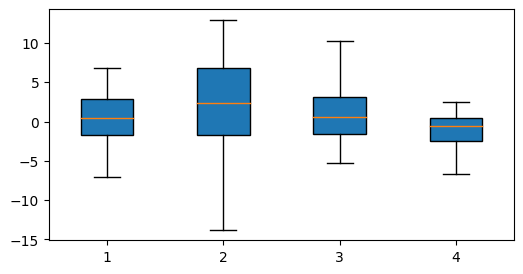

In [7]:
plt.figure(figsize=(6,3))
plt.boxplot(ds.drop(columns='class'), patch_artist=True, showfliers=False)
plt.show()

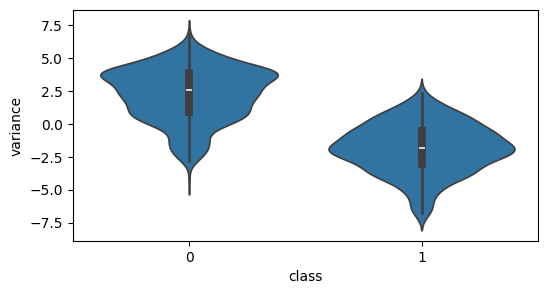

In [8]:
plt.figure(figsize=(6,3))
sns.violinplot(y='variance', x='class', data=ds)
plt.show()

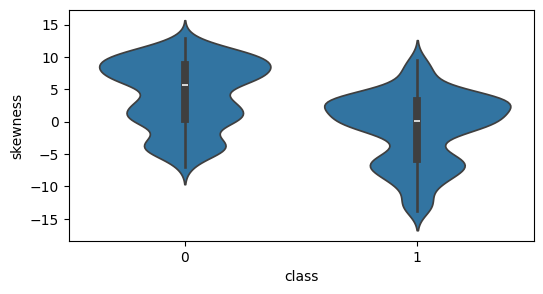

In [9]:
plt.figure(figsize=(6,3))
sns.violinplot(y='skewness', x='class', data=ds)
plt.show()

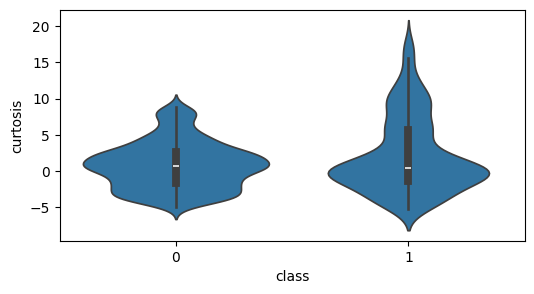

In [10]:
plt.figure(figsize=(6,3))
sns.violinplot(y='curtosis', x='class', data=ds)
plt.show()

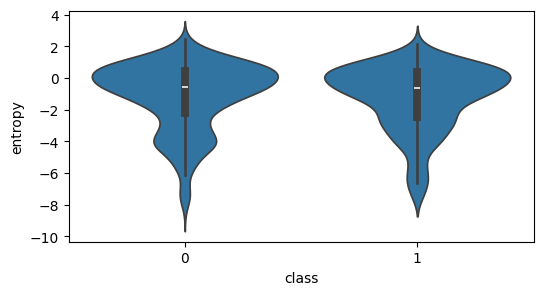

In [11]:
plt.figure(figsize=(6,3))
sns.violinplot(y='entropy', x='class', data=ds)
plt.show()

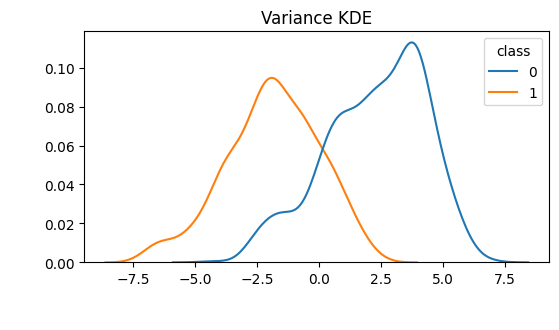

In [12]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=ds, x='variance', hue='class')
plt.title('Variance KDE')
plt.xlabel('Variance', color='white', size=15, labelpad=10)
plt.ylabel('Kernel Density Estimation', color='white', size=15, labelpad=10)
plt.show()

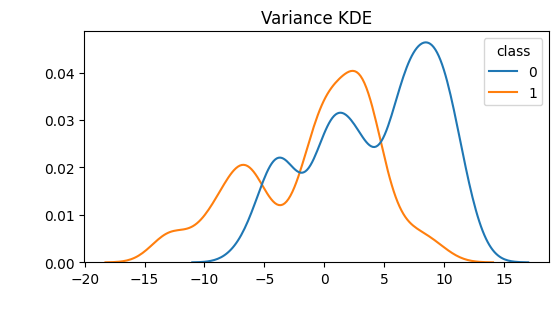

In [13]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=ds, x='skewness', hue='class')
plt.title('Variance KDE')
plt.xlabel('Variance', color='white', size=15, labelpad=10)
plt.ylabel('Kernel Density Estimation', color='white', size=15, labelpad=10)
plt.show()

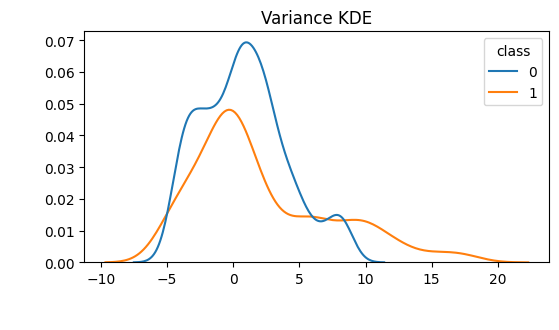

In [14]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=ds, x='curtosis', hue='class')
plt.title('Variance KDE')
plt.xlabel('Variance', color='white', size=15, labelpad=10)
plt.ylabel('Kernel Density Estimation', color='white', size=15, labelpad=10)
plt.show()

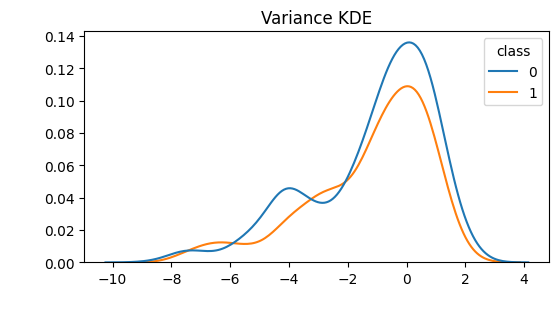

In [15]:
plt.figure(figsize=(6, 3))
sns.kdeplot(data=ds, x='entropy', hue='class')
plt.title('Variance KDE')
plt.xlabel('Variance', color='white', size=15, labelpad=10)
plt.ylabel('Kernel Density Estimation', color='white', size=15, labelpad=10)
plt.show()

In [16]:
corr = ds.corr()
corr[corr > 0.5]

,variance,skewness,curtosis,entropy,class
variance,1.0,NaN,NaN,NaN,NaN
skewness,NaN,1.0,NaN,NaN,NaN
curtosis,NaN,NaN,1.0,NaN,NaN
entropy,NaN,NaN,NaN,1.0,NaN
class,NaN,NaN,NaN,NaN,1.0


In [17]:
corr[corr < -0.7]

,variance,skewness,curtosis,entropy,class
variance,NaN,NaN,NaN,NaN,-0.724843
skewness,NaN,NaN,-0.786895,NaN,NaN
curtosis,NaN,-0.786895,NaN,NaN,NaN
entropy,NaN,NaN,NaN,NaN,NaN
class,-0.724843,NaN,NaN,NaN,NaN


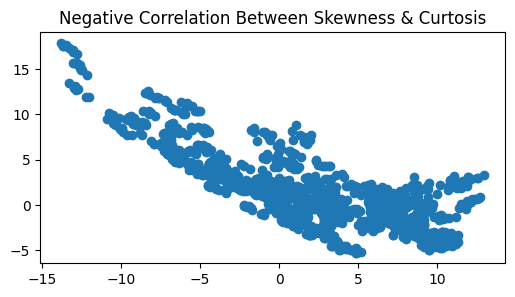

In [18]:
plt.figure(figsize=(6,3))
plt.scatter(x='skewness', y='curtosis', data=ds)
plt.title('Negative Correlation Between Skewness & Curtosis')
plt.show()

In [19]:
X = ds.drop(columns='class')
Y = ds['class']

In [20]:
Y.value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression

In [22]:
logclf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [23]:
print('accuracy train:', round(logclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(logclf.score(X_test, Y_test)*100, 2))

accuracy train: 98.91
accuracy test: 99.64


In [24]:
pickle_out = open('picklefile.pkl','wb')

In [25]:
pickle.dump(logclf, pickle_out)

In [26]:
pickle_out.close()